# Homework 1

Matthew Xu 
5752811

**DUE OCT 19th by 11:59PM**

Homework 1 is done in Jupyter Notebook to give you a chance to familiarize yourself to this powerful tool for data analysis. 

In Jupyter Notebook, codes and texts are executed in cells. Texts are written in Markdown cell, as you can see in the homework instructions below. Codes are written in code cells. Cells are run one at a time. You can change the cell type by navigating to Cell -> Cell Type.

There are spaces for you to enter your answers to the questions, either in code or text. Feel free to add more cells if you need (likely).

In many parts, some Scikit-learn functions and classes have already been imported to give you leads on what you may need to use. You still need to refer to the Scikit-learn documentation to learn how the classes and methods work. You can use other publicly available libraries and packages if you want, as long as they finish the work. 

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures**. Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

## Problem 1

Increase your familiarity with Github. This problem needs to be finished with a partner. Follow these steps to finish the problem:

1.   Create a github account.
2.   Create a public repository and push a helloworld.py file.
3.   Person $A$ forks Person $B$'s repo and modifies the file, then pushes to their own fork and finally creates a pull request for person B to merge.
4.   Person $B$ reviews and merges the pull request.
5.   Do the same for $A$ and $B$ reversed.

Provide the links to your repo and your partner's repo.

In [ ]:
https://github.com/matthewxu8
https://github.com/matthewxu8/PSTAT190DD_HW1
https://github.com/matthewxu8/hw1_190dd

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

## Problem 2

In this problem, you will consider solving the least-squared problem in two different approaches, one using Gradient Descent and the other using the formula. After that, you will compare the results you get from both approaches.

a) Load the 1-D data and the labels from **'linear_regression.csv'**. The first column contains the data values and the second column contains the labels. Store the data in a variable ***X***. Similarly, store the labels in a variable ***y***.

In [2]:
import pandas as pd

#read in csv file
df = pd.read_csv('linear_regression.csv', header = None)

#import x values and labels as y value
x = df[0].to_numpy()
y = df[1].to_numpy()

b) Fit a linear regression model, in the form $Ax + b$, using the formula. Print out the parameters $A$ and $b$.

In [3]:
#instance of linear regression object
reg = linear_model.LinearRegression()

#fit linear model to data
reg.fit(x[:, np.newaxis], y[:, np.newaxis])

#print parameters
print('Parmeter A: ', reg.coef_)
print('Parmeter B: ', reg.intercept_)


Parmeter A:  [[7.526347]]
Parmeter B:  [0.20313216]


Visualize your result in a 2-D plot. Your plot should show the data points and the line $Ax + b$.

<function matplotlib.pyplot.show(*args, **kw)>

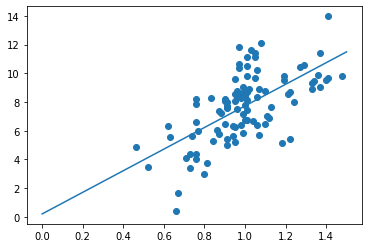

In [6]:
#linear regression fit
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

#create x values, using model predict y values for line
xfit = np.linspace(0, 1.5, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show

c) Now, fit a linear regression model using Gradient Descent. Print out the parameters $A$ and $b$.

In [7]:
# Building the model
slope = 0
intercept = 0

learn_rate = 0.001  # The learning Rate
epochs = 1000000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = slope*x + intercept  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    slope = slope - learn_rate * D_m  # Update m
    intercept = intercept - learn_rate * D_c  # Update c
    
print('Parmeter A: ', slope)
print('Parmeter B: ', intercept)

Parmeter A:  7.526346995919931
Parmeter B:  0.20313216365233178


Visualize your result in a 2-D plot similar to that in part **b**. Compare your results from both parts.

As seen in both plots, the lines are very similar with each iteration of gradeitn descent bringing paramaters a and b of both plots closer together.

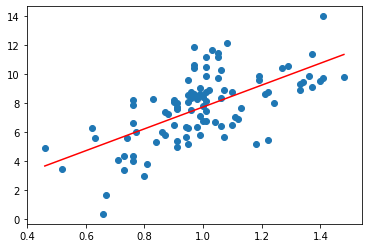

In [14]:
Y_pred = slope*x + intercept

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

## Problem 3

In this problem, you will train classifiers using two widely used algorithms, Support Vector Machine (SVM) and Random Forest (RF). You will train and fine-tune each model using cross-validation (CV). After that, you will compare the performance of SVM and RF for this problem.

a) A 13-D dataset with labels is given in **'wine.csv'**. The last column contains the labels. Store the data and the labels in variables ***X*** and ***y***, respectively.

In [10]:
#read in csv file
data = pd.read_csv('wine.csv', header = None)

#import X values and labels as y value
X = data[data.columns[0:13]].to_numpy()
Y = data[13].to_numpy()

Split the data into a train set and a test set. The size of the train set is 90% of the dataset.

In [11]:
from sklearn.model_selection import train_test_split

#trainw ith 90% of dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)


b) Find a good SVM model by performing 10-fold CV on the train set. Try different set of model parameters and record the resulting model performance during CV. Print out your best model's parameters and its performance (accuracy).

In [14]:
# A few methods to get you started with CV. 
# You are encouraged to look into the model_selection module of Scikit-learn to find tools that best fit your need.
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Set the parameters by cross-validation to try
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

print("# Tuning hyper-parameters for precision")
print()

#10 fold Cross validation on above parameters
clf = GridSearchCV(SVC(), tuned_parameters, cv = 10, scoring='precision_macro')
#fit model to X_train, y_train
clf.fit(X_train, y_train)

#best score and best parameters
print("Best parameters set found on development GridSearchCV set:")
print(clf.best_params_)
print("Best Score found on development GridSearchCV set:")
print(clf.best_score_)


# Tuning hyper-parameters for precision

Best parameters set found on development GridSearchCV set:

{'C': 10, 'kernel': 'linear'}

Best Score found on development GridSearchCV set:

0.9629761904761907



Now train your best SVM model on the whole train dataset and test it on the test set. Print out your model's performance.

In [42]:
from sklearn.metrics import accuracy_score

#create best model from above outputs
clf_best = SVC(kernel = 'linear', C = 10)

#train best model to training sets
clf_best.fit(X_train, y_train)

#predict labels based on best model and test data
Y_predictions = clf_best.predict(X_test) 
 
#compare to true label test data
print(accuracy_score(Y_predictions, y_test)) 

1.0


c) Similarly, find a good RF model by performing 10-fold CV on the train set. Print out your best model's parameters and its performance (accuracy).

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#create random forest classifier
rf = RandomForestClassifier()

#tuning paramaters to test for randomforest
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 30, 40, 50],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [5, 10, 15, 20]
}

#grid search using the above paramater and model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10)
#fit mdoel to x_train and y_train
grid_search.fit(X_train, y_train)

print("Best parameters set found on development GridSearchCV set:")
print(grid_search.best_params_)
print("Best Score found on development GridSearchCV set:")
print(grid_search.best_score_)


{'bootstrap': True, 'max_depth': 20, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 20}


0.9875

Test your best RF model on the test set. Print out your model's performance.

In [52]:
from sklearn.metrics import accuracy_score

#create best model using best parameter output
forest_best = RandomForestClassifier(bootstrap = True, max_depth = 20, 
                                     max_features = 3, min_samples_leaf = 3, 
                                     min_samples_split = 12, n_estimators = 20)

#fit best model to x_train and y_train data
forest_best.fit(X_train, y_train)

#predit using best model on x_test data
Y_predictions1 = forest_best.predict(X_test) 

#compare label test data and predicted
print(accuracy_score(Y_predictions1, y_test)) 

1.0


d) Compare the 2 models. Why do we need CV?

Although they both have an accuracy score of 1.0, these functions have different levels of efficiency for each type of model. They also solve different problems and classifciatiosn with one ending with a forest of trees and the other hyperplanes to classify data.

In machine learning, when a model has been trained and tested, training error between predicted and true responses is calculated. The model cannot be generalized to other sets, due to small amount of training data, underfitting or overfitting data. One way to resolve this is to use cross validation (CV) by removing part of the data to be train/test and using it to get predictions from the model trained on rest of the data. 


## Problem 4

In this problem, you will work on the clustering problem using Bottom-up Agglomerative clustering and K-mean clustering.

a) A 4-D dataset is given in **'iris.csv'** with the last column being the ground truth label. Load the file. Store the data in a variable ***X*** and store the label in a variable ***y***. Because clustering is an unsupervised task, there is no need for the labels during training.

b) Train a clustering model using Bottom-up Agglomerative clustering.

In [ ]:
from sklearn.cluster import AgglomerativeClustering


Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color. 

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

c) Train a clustering model using K-mean clustering.

In [ ]:
from sklearn.cluster import KMeans


Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color.

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

d) Perform Principle Component Analysis (PCA) on the data. Project the original data on the 2 largest principle components. Store this new projected 2-D data in a variable ***X_projected***.

In [ ]:
from sklearn.decomposition import PCA


Repeat part **b** on the new 2-D data. Train the Bottom-up Agglomerative model and visualize your results.

Repeat part **c** on the new 2-D data. Train the K-means model and visualize your result.

Compare the quality of 4-D and 2-D clusterings. When would the ideas of projection and dimensionality reduction be useful?

## Problem 5

What is the hypothesis space for problems 1-3? What are the pros and cons of having a large hypothesis space? 

In problem 2, linear regression hypothesis space is the set of all functions for which linear resgression can generalize the data, including linear functions on polynomials. In problem 3, the hypothesis space of an SVM is the set of all possible hyperplanes. For random forest, the hypothesis space is the set of all possible forests made of all possible trees. Pros of having large hypothesis space is having large set of potential models and having more variability to find a better model. Cons of having large hypothesis space is finding best paramaters harder, taking more time in grid search, and also more costly to implement.

## Problem 6

Suppose we find the best binary classifier for a set of red points and another binary classifier for a set of blue points. Now, suppose we are given a new set of $R$ red and $B$ blue points that we can predict to be positive or negative. If we have to choose a subset of $k$ positive points from $R$ union $B$, what would be fair way for choosing. 

You are given a red dataset in 'R.csv' and a blue dataset in 'B.csv'. There is also a third test dataset in 'RBtest.csv'.

a) Load the datasets. All datasets are 2-D with the last column containing the labels. 

In [8]:
#read in csv file
data = pd.read_csv('R.csv', header = None)

#import red x values and labels as  red y value
R_X = data[data.columns[0:2]].to_numpy()
R_Y = data[2].to_numpy()

#read in csv file
data = pd.read_csv('B.csv', header = None)

#import blue x values and labels as blue y value
B_X = data[data.columns[0:2]].to_numpy()
B_Y = data[2].to_numpy()

b) Train 2 classifiers, one for the red dataset and the other for the blue dataset. You are free to choose the learning algorithm. 

In [11]:
# Set the parameters by cross-validation
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid
from sklearn.model_selection import train_test_split

#split both red and blue data sets 
Red_trainX, Red_testX, Red_trainY, Red_testY = train_test_split(R_X, R_Y, test_size = 0.1, random_state=20)
Blue_trainX, Blue_testX, Blue_trainY, Blue_testY = train_test_split(B_X, B_Y, test_size = 0.1, random_state=69)

#create SVM models 
red_SVM = SVC()
blue_SVM = SVC()

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2 ,1e-3, 1e-4],
                     'C': [1, 3, 5, 10, 20, 100, 200, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 200, 1000, 2000]}]

print("# Tuning hyper-parameters for precision")
print()

clf_red = GridSearchCV(red_SVM, tuned_parameters, cv = 10)
clf_red.fit(Red_trainX, Red_trainY)

clf_blue = GridSearchCV(blue_SVM, tuned_parameters, cv = 10)
clf_blue.fit(Blue_trainX, Blue_trainY)

print("Best parameters set Red:")
print(clf_red.best_params_)
print("Best parameters set Blue:")
print(clf_blue.best_params_)
print()

#using best mdoels for both red and blue
#NOTE: probabilty = true is to use predict_proba function in 6c. decision_function_shape is also used to graph in 6c
red_best = SVC(kernel = 'rbf', gamma = 0.01, C = 1000, probability = True, decision_function_shape='ovo')
red_best.fit(Red_trainX, Red_trainY)

Red_predictions = red_best.predict(Red_testX) 

blue_best = SVC(kernel = 'rbf', gamma = 0.01, C = 10, probability = True, decision_function_shape='ovo')
blue_best.fit(Blue_trainX, Blue_trainY)

Blue_predictions = blue_best.predict(Blue_testX) 
 
#create accuracy score based on predictions vs test values
print(accuracy_score(Red_predictions, Red_testY)) 
print(accuracy_score(Blue_predictions, Blue_testY)) 


# Tuning hyper-parameters for precision

Best parameters set Red:
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best parameters set Blue:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

0.875
0.9375


c) Now use your models to classify instances in the test dataset. The models may agree on many points but may also disagree on many other points. Let's call the set of positive points classified by the red model $P_r$ and the set of positive points classified by the blue model $P_b$. You are asked to pick out $k$ points from the set $P_r \cup P_b$. What is a fair way to do this. Demonstrate your answer with code and visualizations. 

Using the best mdoela from red and blue, we extract all positive values from sets of Red and Set of Blue and create a set union of both as indicated in the question. Then by using the metric of both colors prob using predict_prob, a function that finds proabilities closest to a spesfic clasifier, we can find how close the probailbity is to the rb_test data. The metric used is red probabilty * accuracy + blue probability * accuracy. This is a fair way to measure as accuracy of the model is factored into the probability and this metric is used for all sets of potential postive points. By putting these poitns into a max heap, we can pop the max heap for the best possible values, extracting k values of the set. Shown below is the set of postive and negative points in the descision area with red best on red side and blue on blue side. 

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1


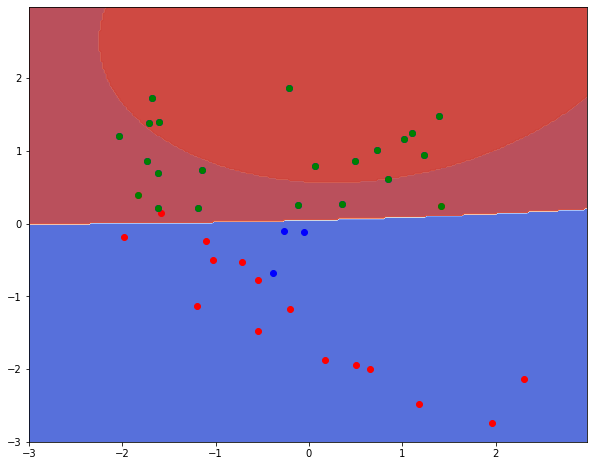

In [33]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import heapq

#read in test data in RBtest
redblue = pd.read_csv('RBtest.csv', header=None)
rb_X = redblue[redblue.columns[0:2]]
rb_y = redblue[2]

#predictions on test values to use for accuracy scoring
rb_predR = red_best.predict(rb_X)
rb_predB = blue_best.predict(rb_X)

accuracy_R = accuracy_score(rb_predR, rb_y)
accuracy_B = accuracy_score(rb_predB, rb_y)

#extract postive and negative values
positiveRx = np.where(rb_predR==1)[0]
positiveBx = np.where(rb_predB==1)[0]

#create union of the set of postive values in Red and Blue as stated above
pUidx = set(positiveRx) |  set(positiveBx)

#using heap to extract largest probabilities of the union set 
#this is done with the metric score*accur for both colors
scorelist = []
for x in pUidx:
    redprob = red_best.predict_proba([[rb_X[0][x],rb_X[1][x]]])[0][1]
    blueprob = blue_best.predict_proba([[rb_X[0][x],rb_X[1][x]]])[0][1]
    scorelist.append((redprob*accuracy_R +blueprob*accuracy_B,x)) # the value x is the location

scoreheap = heapq._heapify_max(scorelist) #creation of max heap

finalscores = []
#k is number of values  pulled
p = 22
for i in range(p):
    finalscores.append(heapq._heappop_max(scorelist))

#printing postive/negative values of max values pulled from heap
for i in finalscores:
    print(rb_y[i[1]])

    
#plotting descsion regions
xx, yy = np.meshgrid(np.arange(-3, 3, 0.02),
                     np.arange(-3, 3, 0.02))

#shape region
Z1 = red_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
Z2 = blue_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

k = 10
colors = ['red', 'blue']

newfig = plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z1, cmap=plt.cm.coolwarm, alpha=0.8) 
plt.contourf(xx, yy, Z2, cmap=plt.cm.coolwarm, alpha=0.8)
for j in range(rbX.shape[0]):
        plt.scatter(rbX[0][j],rbX[1][j],color= colors[rby[j]])
for i in finalist:
        index = i[1]
        plt.scatter(rbX[0][index], rbX[1][index], color = 'green')

plt.show()